# ECE 276 Project 2: LiDAR based SLAM

1. load data

In [ ]:
# !pip install open3d matplotlib numpy
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display
import time
import os

from icp_warm_up.utils import read_canonical_model, load_pc, visualize_icp_result, show_icp_warmup
import pr2_utils as U
from load_data import load_dataset
from mapping_utils import *
from main_mapping import *
os.makedirs('outputs', exist_ok=True)

def show_map(path, width=700):
    display(IPyImage(filename=path, width=width))


print("done")





done


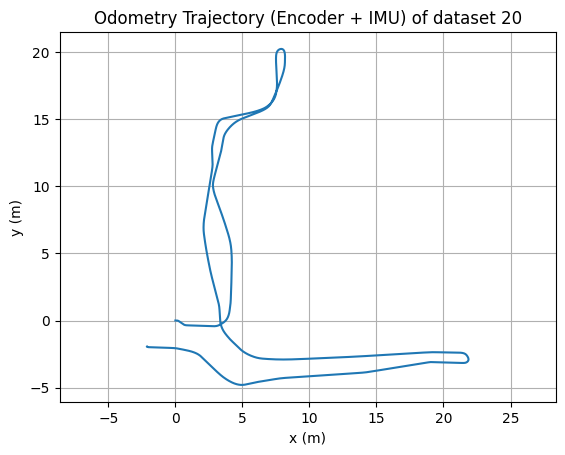

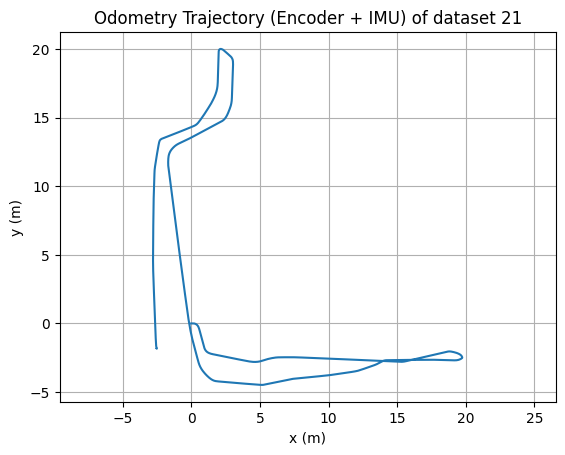

In [2]:
_ = U.encoder_IMU_odometry(20, plot=True)
_ = U.encoder_IMU_odometry(21, plot=True)

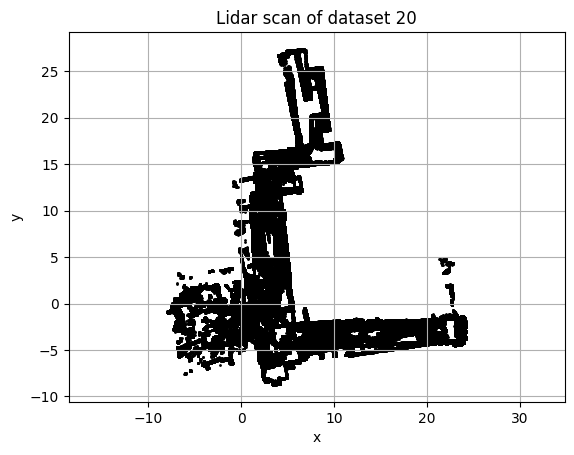

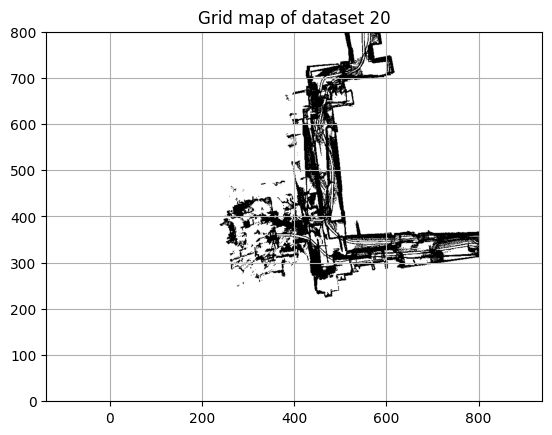

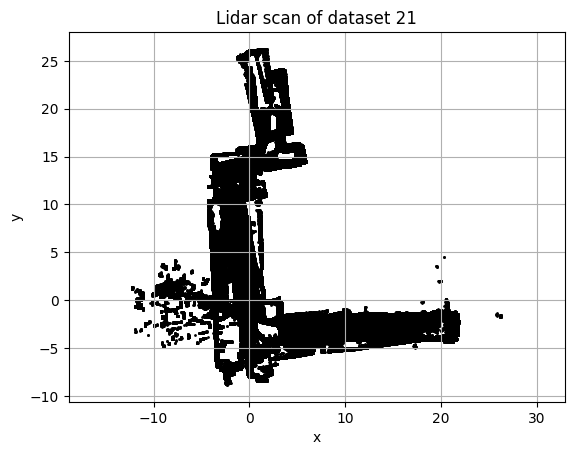

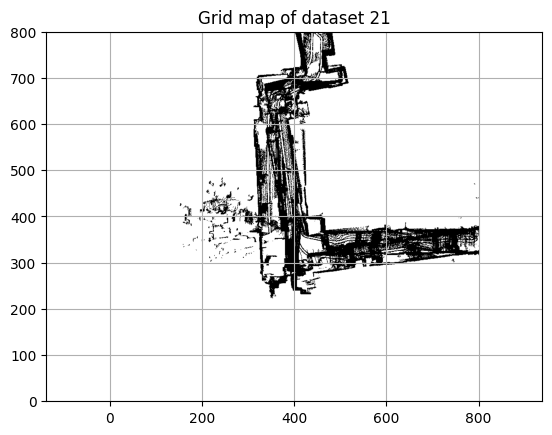

In [3]:
_ = U.test_map(dataset=20)
_ = U.test_map(dataset=21)

# 2. Point-cloud registration via iterative closest point (ICP):


 Drill 0 Best yaw:  0.17453292519943275 
Drill 0 Best MSE:  8.743541900841658e-06

 Drill 1 Best yaw:  0.17453292519943275 
Drill 1 Best MSE:  9.071476966432764e-06

 Drill 2 Best yaw:  -2.443460952792061 
Drill 2 Best MSE:  3.726714388083333e-05

 Drill 3 Best yaw:  -2.0943951023931957 
Drill 3 Best MSE:  3.365179971514614e-05


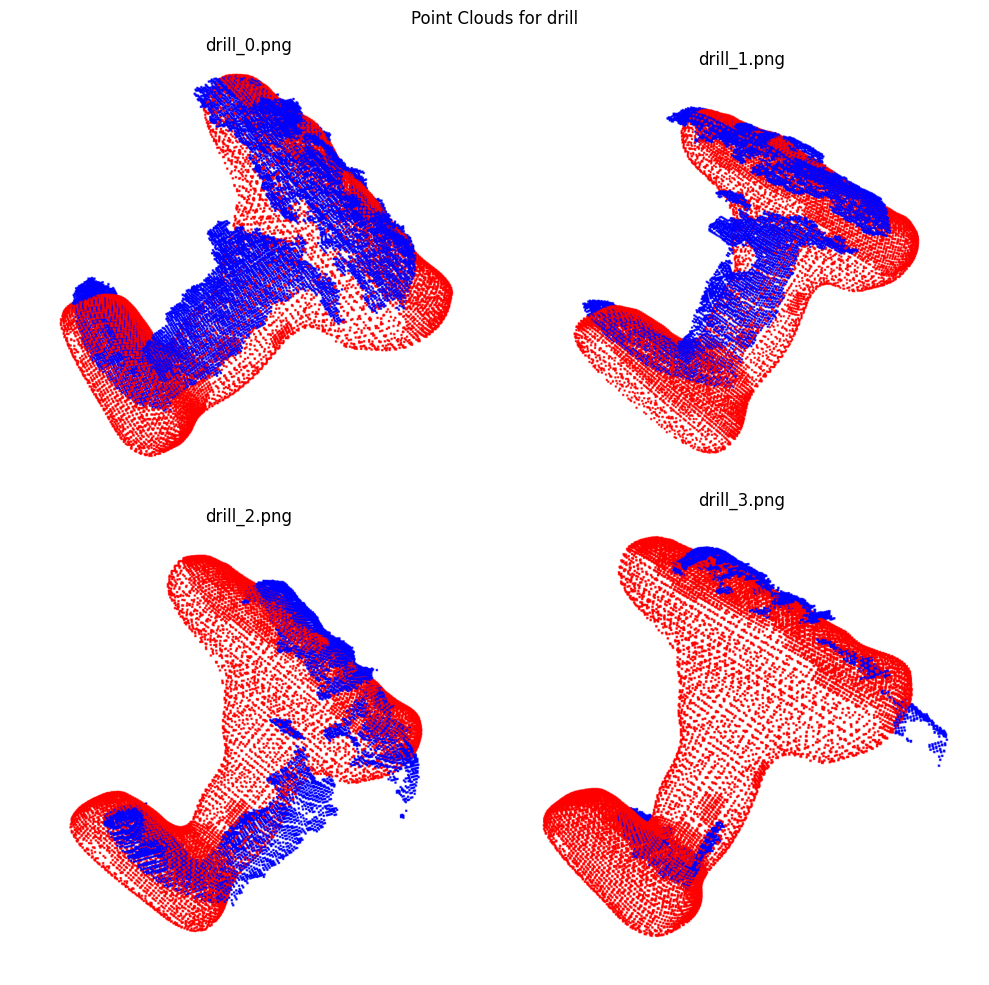

In [4]:
# Warm up
# Drill

n = [0, 1, 2 , 3]
for i in n:
    Z, M, pose, mse, R, p, yaw  = U.warmup_icp("drill", i, yaw_steps=36)
    print(f"\n Drill {i} Best yaw: ", yaw, f"\nDrill {i} Best MSE: ", mse)
    visualize_icp_result(Z, M, pose, "drill", i)

show_icp_warmup("drill")


liq_container 0 Best yaw:  -0.5235987755982987 
liq_container 0 Best MSE:  1.4462653847912546e-05

liq_container 1 Best yaw:  -0.5235987755982987 
liq_container 1 Best MSE:  1.4462653847912546e-05

liq_container 2 Best yaw:  -0.5235987755982987 
liq_container 2 Best MSE:  1.4462653847912546e-05

liq_container 3 Best yaw:  -0.5235987755982987 
liq_container 3 Best MSE:  1.4462653847912546e-05


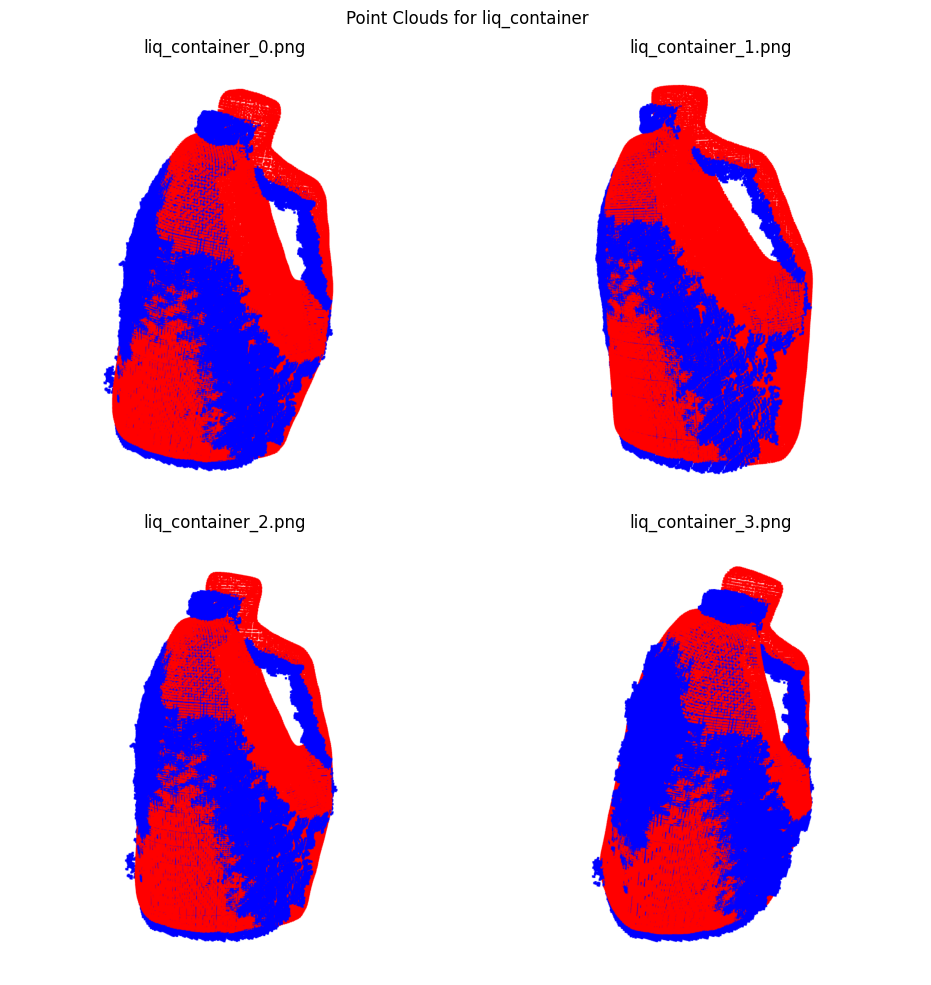

In [5]:
# Warm up
n = [0, 1, 2 , 3]
# Liquid Container
for i in n:
    Z, M, pose, mse, R, p, yaw  = U.warmup_icp("liq_container", 0, yaw_steps=36)
    print(f"\nliq_container {i} Best yaw: ", yaw, f"\nliq_container {i} Best MSE: ", mse)
    visualize_icp_result(Z, M, pose, "liq_container", i)

show_icp_warmup("liq_container")

1081
lidar_ranges shape: (1081, 4962)
dataset:  20 mean mse:  0.000714605156591961 max mse:  0.03200699592015327


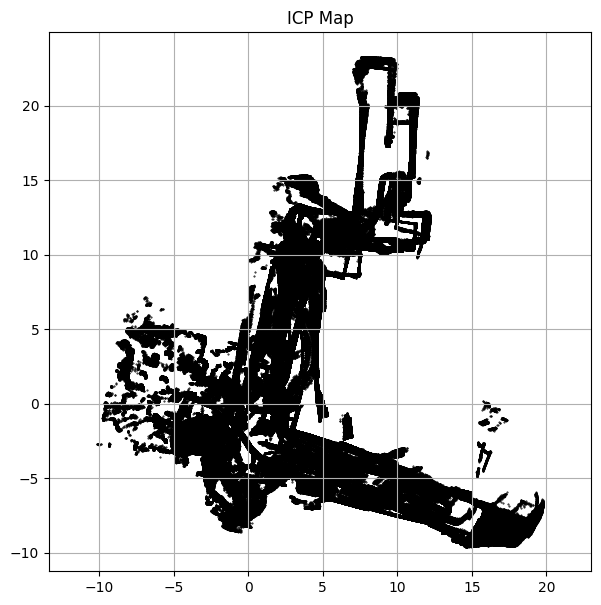

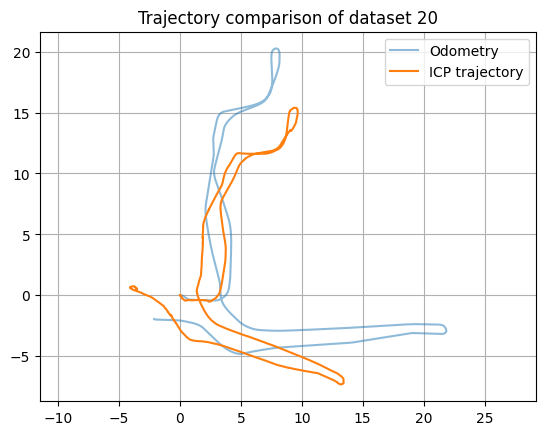

In [6]:
# 2b - Dataset 20
dataset = 20
R_list, p_list, mse_list, x_icp, y_icp, theta_icp = U.ICP_dataset(dataset)
encoder_data, lidar_data, imu_data, _ = load_dataset(dataset)
_, _, _, encoder_t, _, _, _, x, y, theta, _, _, _ = U.encoder_IMU_odometry(dataset)

U.plot_trajectory(x, y, x_icp, y_icp, dataset)

1081
lidar_ranges shape: (1081, 4785)
dataset:  21 mean mse:  0.001048318147264705 max mse:  0.10799021745827045


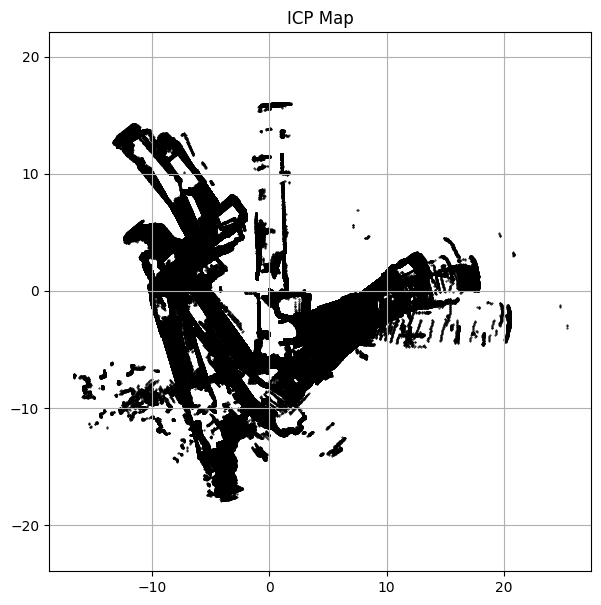

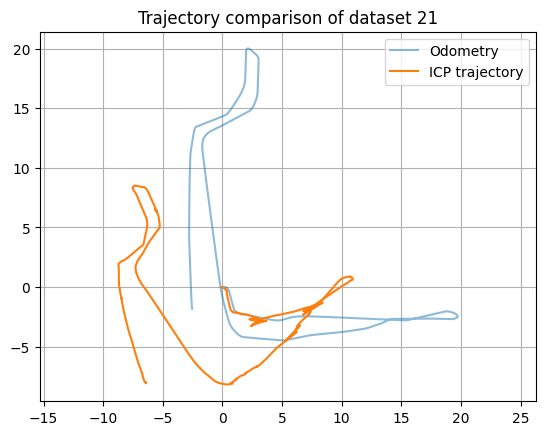

In [7]:
# 2b - Dataset 21
dataset = 21
R_list, p_list, mse_list, x_icp, y_icp, theta_icp  = U.ICP_dataset(dataset)
encoder_data, lidar_data, imu_data, _ = load_dataset(dataset)
_, _, _, encoder_t, _, _, _, x, y, theta, _, _, _ = U.encoder_IMU_odometry(dataset)


U.plot_trajectory(x, y, x_icp, y_icp, dataset)



# Part 3: Occupancy and Texture Mapping

Occupancy Map: Processed scan 0/4962
Occupancy Map: Processed scan 1000/4962
Occupancy Map: Processed scan 2000/4962
Occupancy Map: Processed scan 3000/4962
Occupancy Map: Processed scan 4000/4962
Kinect processed: 0/2407
Kinect processed: 1000/2407
Kinect processed: 2000/2407
Finished texture map
Saved outputs/occupancy_icp_20.png


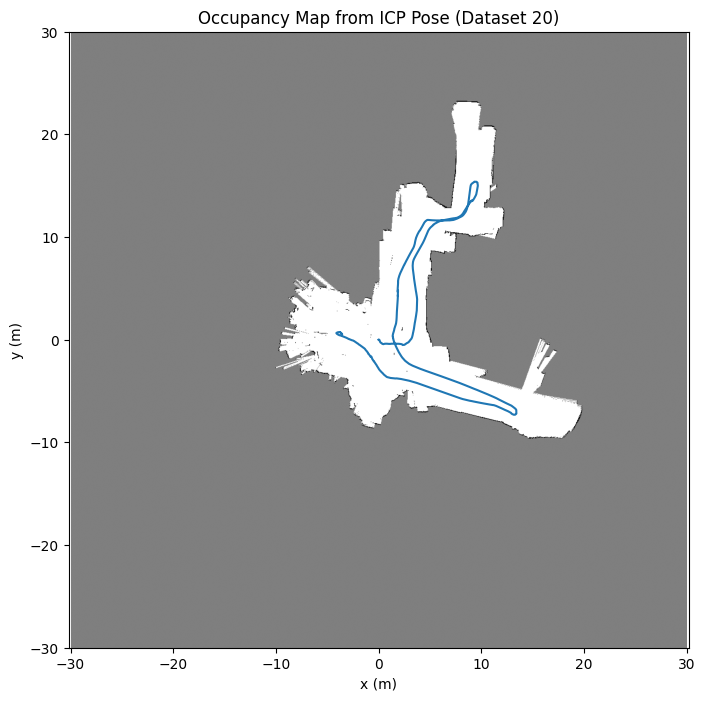

Saved outputs/full_texture_icp_20.png


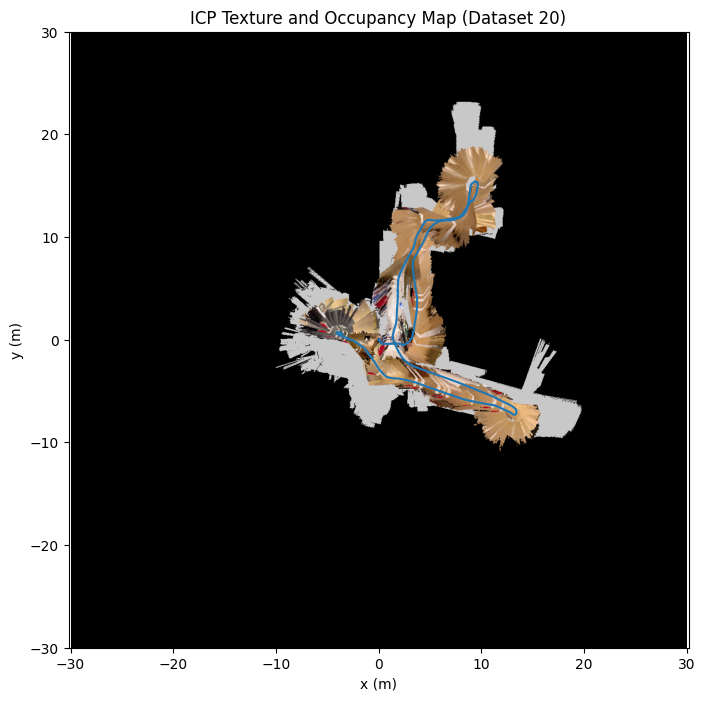

Occupancy Map: Processed scan 0/4962
Occupancy Map: Processed scan 1000/4962
Occupancy Map: Processed scan 2000/4962
Occupancy Map: Processed scan 3000/4962
Occupancy Map: Processed scan 4000/4962
Kinect processed: 0/2407
Kinect processed: 1000/2407
Kinect processed: 2000/2407
Finished texture map
Saved outputs/occupancy_odom_20.png


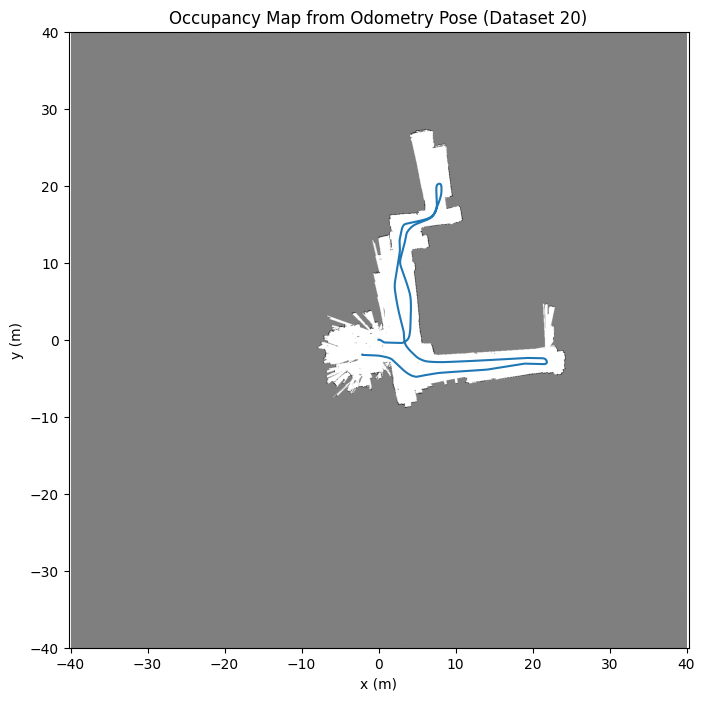

Saved outputs/full_texture_odom_20.png


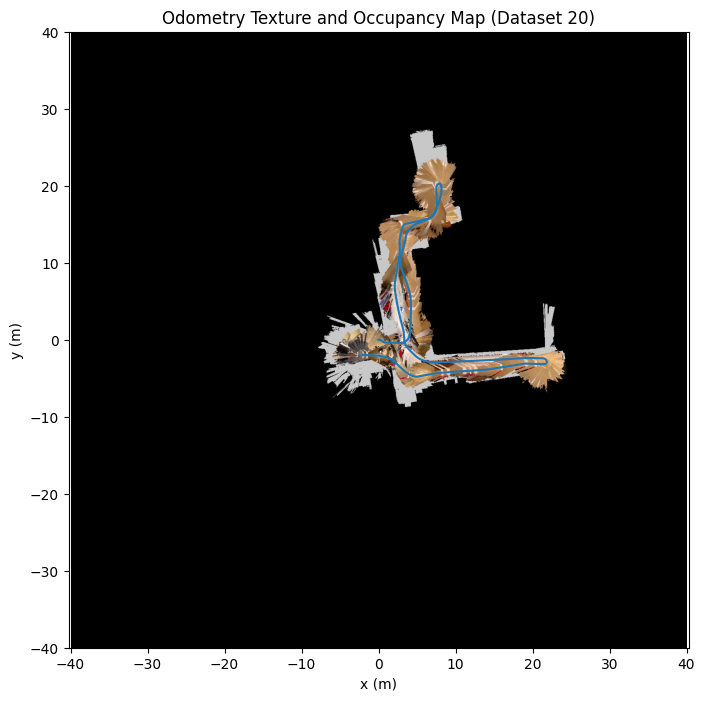

Occupancy Map: Processed scan 0/4785
Occupancy Map: Processed scan 1000/4785
Occupancy Map: Processed scan 2000/4785
Occupancy Map: Processed scan 3000/4785
Occupancy Map: Processed scan 4000/4785
Kinect processed: 0/2188
Kinect processed: 1000/2188
Kinect processed: 2000/2188
Finished texture map
Saved outputs/occupancy_icp_21.png


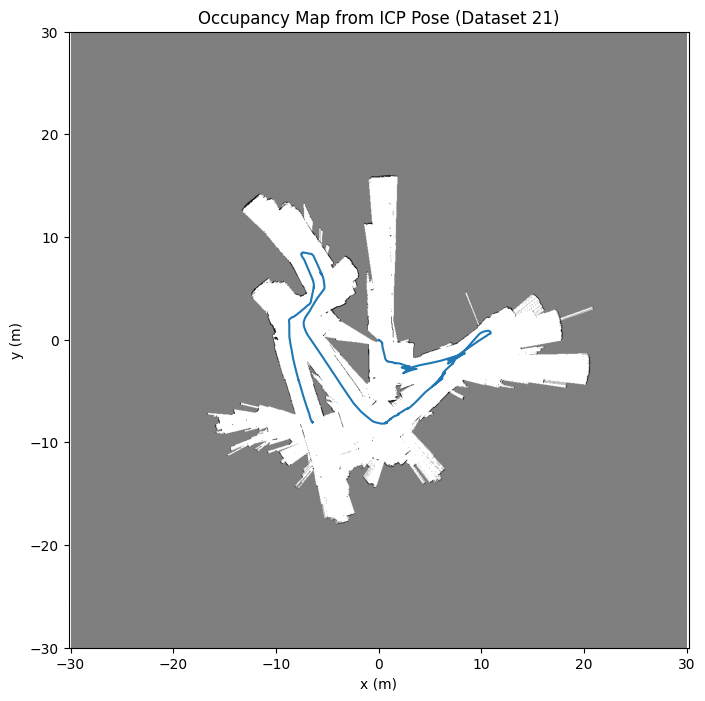

Saved outputs/full_texture_icp_21.png


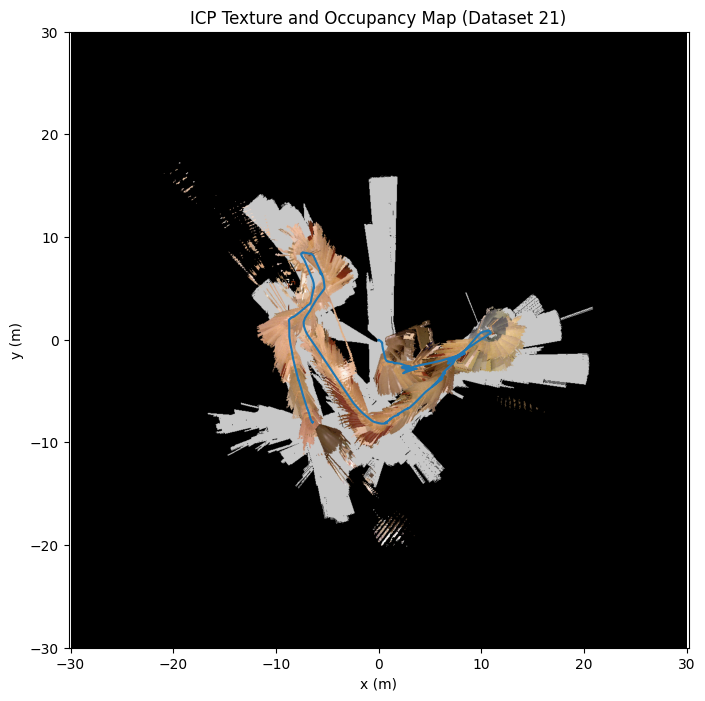

Occupancy Map: Processed scan 0/4785
Occupancy Map: Processed scan 1000/4785
Occupancy Map: Processed scan 2000/4785
Occupancy Map: Processed scan 3000/4785
Occupancy Map: Processed scan 4000/4785
Kinect processed: 0/2188
Kinect processed: 1000/2188
Kinect processed: 2000/2188
Finished texture map
Saved outputs/occupancy_odom_21.png


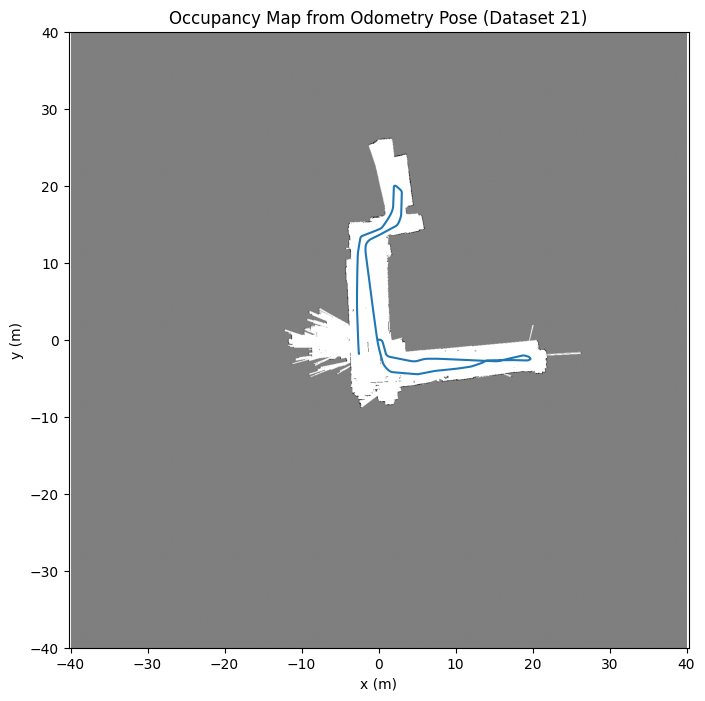

Saved outputs/full_texture_odom_21.png


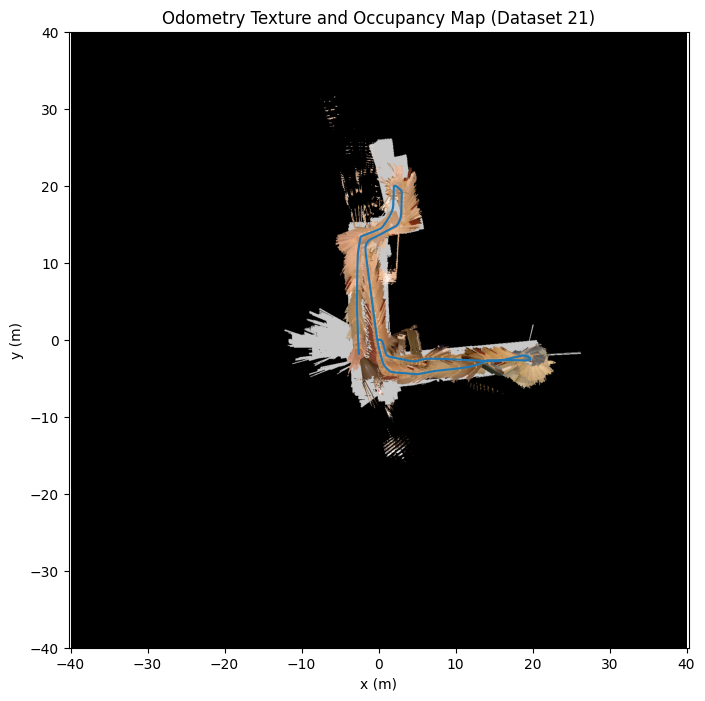

In [8]:
dataset = [20, 21]

for d in dataset:
    occ_icp, tex_icp, size_i, map_min_i, map_max_i, res_i, pose_icp = run_icp_map(d)
    x_icp, y_icp, th_icp = pose_icp

    plot_occupancy(occ_icp, map_min_i, map_max_i, x_icp, y_icp, ICP=True, dataset=d)
    plot_texture_overlay(occ_icp, tex_icp, map_min_i, map_max_i, x_icp, y_icp, ICP = True, dataset=d)


    occ_odom, tex_odom, size_o, map_min_o, map_max_o, res_o, pose_odom = run_odom_map(d)
    x_odom, y_odom, th_odom = pose_odom

    plot_occupancy(occ_odom, map_min_o, map_max_o, x_odom, y_odom, ICP=False, dataset=d)
    plot_texture_overlay(occ_odom, tex_odom, map_min_o, map_max_o, x_odom, y_odom, ICP=False, dataset=d)


# Part 4: Pose graph Optimization and loop enclosure

In [ ]:
# Factor Graph Optimization
dataset = [20, 21]
